In [1]:
import os
import cv2
import keras
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.utils import shuffle
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import datasets, layers, models
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
%matplotlib inline

2023-05-23 18:35:29.094612: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
dataset_path = os.listdir("test")
image_types = os.listdir("test")
print(image_types)
print("folders found are: " + str(len(dataset_path)))

['41-50', '31-40', '20-30']
folders found are: 3


In [3]:
images = []
for item in image_types:
    # Get all file names
    all_images = os.listdir("test" + "/" + item)
    # print(all_signatures)
    
    # Add them to the list
    for image in all_images:
        images.append((item, str("test" + "/" + item) + "/" + image))
        

In [4]:
# Building a dataframe

ages_df = pd.DataFrame(data=images, columns=["Label", "Image"])
ages_df.head()

,Label,Image
0,41-50,test/41-50/155153.jpg
1,41-50,test/41-50/138397.jpg
2,41-50,test/41-50/155147.jpg
3,41-50,test/41-50/148777 copy 9.jpg
4,41-50,test/41-50/155261 copy 4.jpg


In [5]:
print("Total number of ages in the dataset: " + str(len(ages_df)))
print("Shape of the dataset: " + str((ages_df.shape)))
print("Null Values Exist: " + str(ages_df.isnull().any()))

Total number of ages in the dataset: 13366
Shape of the dataset: (13366, 2)
Null Values Exist: Label    False
Image    False
dtype: bool


In [6]:
ages_df.groupby("Label").count().transpose()

Label,20-30,31-40,41-50
Image,5500,4464,3402


<AxesSubplot:xlabel='Label', ylabel='count'>

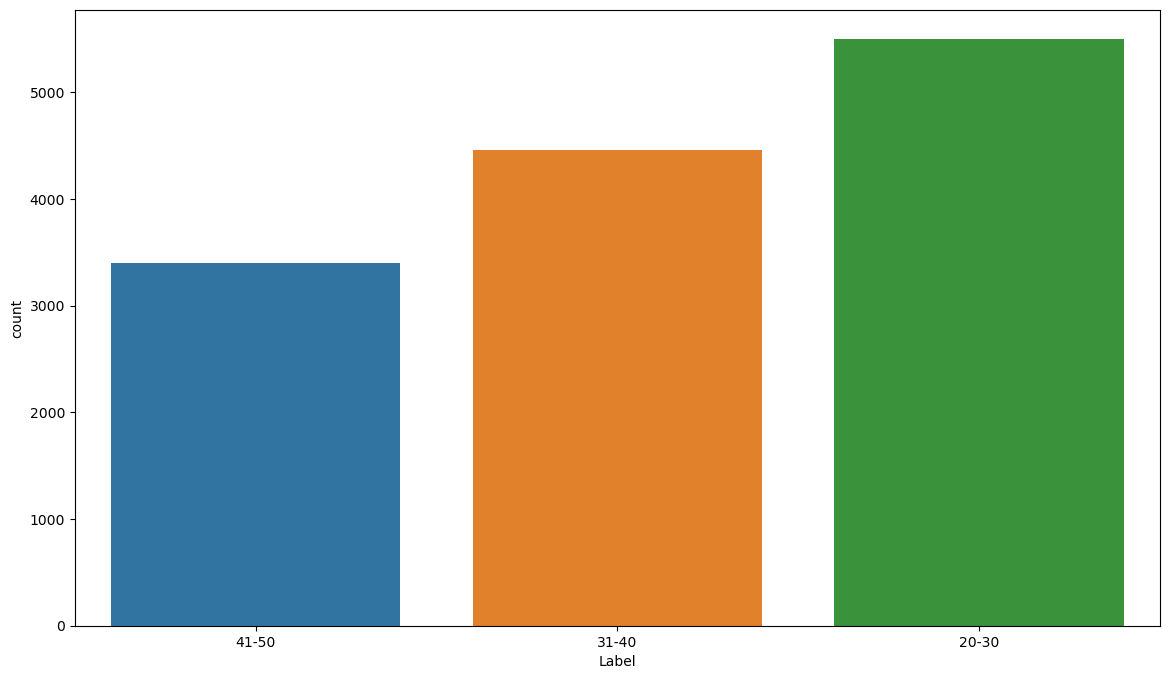

In [7]:
plt.figure(figsize=(14,8))
sns.countplot(x=ages_df["Label"])

In [8]:
path = "test/"

im_size = 150

images = []
labels = []

for i in image_types:
    data_path = path + str(i)
    filenames = [i for i in os.listdir(data_path)]
    
    for f in filenames:
        img = cv2.imread(data_path + "/" + f)
        if img is None:
            print('Wrong path:', data_path)
        else:
            img = cv2.resize(img, (im_size, im_size))
            images.append(img)
            labels.append(i)


Wrong path: test/41-50
Wrong path: test/31-40
Wrong path: test/20-30


In [9]:
images = np.array(images, dtype="float32")
images.shape

(13363, 150, 150, 3)

In [10]:
label= pd.DataFrame(labels, columns=["label"])
label.head()

,label
0,41-50
1,41-50
2,41-50
3,41-50
4,41-50


In [11]:
y_labelencoder = LabelEncoder()
Y = label["label"].values
Y = y_labelencoder.fit_transform(Y)
Y = np.array(Y, dtype="int32")
Y.shape

(13363,)

In [12]:
images, Y = shuffle(images, Y, random_state = 1)
x_train, x_test, y_train, y_test = train_test_split(images, Y, test_size=0.2, random_state = 5)
print("Training Set Features: ", x_train.shape)
print("Training Set Lables: ", y_train.shape)
print("Test Set Features: ", x_test.shape)
print("Test Set Labels: ", y_test.shape)

Training Set Features:  (10690, 150, 150, 3)
Training Set Lables:  (10690,)
Test Set Features:  (2673, 150, 150, 3)
Test Set Labels:  (2673,)


In [13]:
def process(image):
    tf.cast(image/255., tf.float32)
    return image

x_train = process(x_train)
x_test = process(x_test)

2023-05-23 18:40:46.815338: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
print(x_train)
print(x_test)

[[[[227. 227. 227.]
   [228. 228. 228.]
   [230. 230. 230.]
   ...
   [213. 209. 207.]
   [212. 207. 204.]
   [213. 208. 205.]]

  [[227. 227. 227.]
   [228. 228. 228.]
   [230. 230. 230.]
   ...
   [213. 208. 207.]
   [212. 207. 204.]
   [213. 208. 205.]]

  [[227. 227. 227.]
   [228. 228. 228.]
   [230. 230. 230.]
   ...
   [212. 208. 206.]
   [212. 208. 205.]
   [213. 209. 205.]]

  ...

  [[ 27.  22.  23.]
   [ 25.  22.  23.]
   [ 25.  22.  23.]
   ...
   [ 54.  82. 120.]
   [ 79. 111. 154.]
   [ 89. 124. 168.]]

  [[ 27.  22.  24.]
   [ 25.  22.  24.]
   [ 24.  21.  23.]
   ...
   [ 68.  97. 139.]
   [ 81. 115. 162.]
   [ 80. 116. 165.]]

  [[ 26.  21.  23.]
   [ 24.  21.  23.]
   [ 24.  21.  23.]
   ...
   [ 79. 108. 154.]
   [ 83. 117. 167.]
   [ 74. 111. 163.]]]


 [[[  3.   5.  40.]
   [  3.   5.  40.]
   [  3.   5.  40.]
   ...
   [  2.   3.   6.]
   [  2.   4.   5.]
   [  2.   4.   5.]]

  [[  3.   5.  40.]
   [  3.   5.  40.]
   [  3.   5.  40.]
   ...
   [  2.   3.   7.]
 

In [39]:
# early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)

# cnn_model = tf.keras.Sequential([
    
#     layers.Conv2D(32, (3,3), activation = "relu", input_shape = (150, 150, 3)), layers.MaxPooling2D(),
#     layers.Conv2D(32, (3,3), activation = "relu"), layers.MaxPooling2D(),
    
#     layers.Flatten(),
#     layers.Dense(128, activation=tf.nn.relu),
#     layers.Dense(6, activation=tf.nn.softmax)
    
# ])

# cnn_model.compile(optimizer = keras.optimizers.RMSprop(learning_rate = 1e-5), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)
cnn_model = tf.keras.Sequential([
    layers.Conv2D(32, (3,3), activation = "relu", input_shape = (150, 150, 3)), layers.MaxPooling2D(),
    layers.Conv2D(32, (3,3), activation = "relu", input_shape = (150, 150, 3)), layers.MaxPooling2D(),
    layers.Conv2D(32, (3,3), activation = "relu"), layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dense(128, activation=tf.nn.relu),
    layers.Dense(6, activation=tf.nn.softmax)
    
])

cnn_model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])


In [40]:
history = cnn_model.fit(x_train, y_train, epochs=10, validation_data = (x_test, y_test), callbacks = [early_stop])
history

Epoch 1/10
335/335 [==============================] - 108s 321ms/step - loss: 9.0164 - accuracy: 0.3960 - val_loss: 10.3769 - val_accuracy: 0.3453
Epoch 2/10
335/335 [==============================] - 114s 341ms/step - loss: 4.0321 - accuracy: 0.4891 - val_loss: 5.0120 - val_accuracy: 0.5398
Epoch 3/10
335/335 [==============================] - 112s 333ms/step - loss: 2.5057 - accuracy: 0.5766 - val_loss: 3.8118 - val_accuracy: 0.4789
Epoch 4/10
335/335 [==============================] - 108s 323ms/step - loss: 1.5553 - accuracy: 0.6687 - val_loss: 4.0764 - val_accuracy: 0.4770
Epoch 5/10
335/335 [==============================] - 111s 331ms/step - loss: 0.9887 - accuracy: 0.7517 - val_loss: 1.7689 - val_accuracy: 0.6337
Epoch 6/10
335/335 [==============================] - 108s 321ms/step - loss: 0.6601 - accuracy: 0.8183 - val_loss: 0.7907 - val_accuracy: 0.7793
Epoch 7/10
335/335 [==============================] - 108s 321ms/step - loss: 0.4082 - accuracy: 0.8790 - val_loss: 0.6665 

In [41]:
cnn_output_df = pd.DataFrame(cnn_model.history.history)
cnn_output_df

,loss,accuracy,val_loss,val_accuracy
0,9.016371,0.395978,10.376904,0.345305
1,4.032102,0.489055,5.011968,0.539843
2,2.505704,0.576614,3.811753,0.478863
3,1.555283,0.668662,4.076415,0.476992
4,0.988680,0.751731,1.768889,0.633745
5,0.660106,0.818335,0.790732,0.779274
6,0.408176,0.878952,0.666509,0.830527
7,0.262283,0.916183,1.045648,0.781893
8,0.187967,0.942282,0.495039,0.894501
9,0.126429,0.960524,0.476064,0.884400


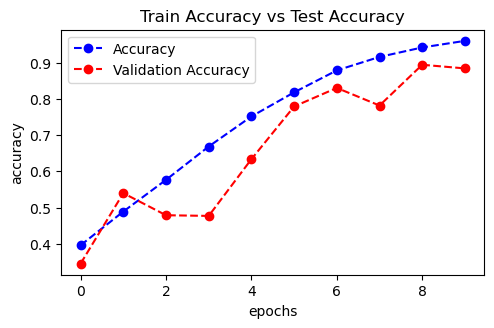

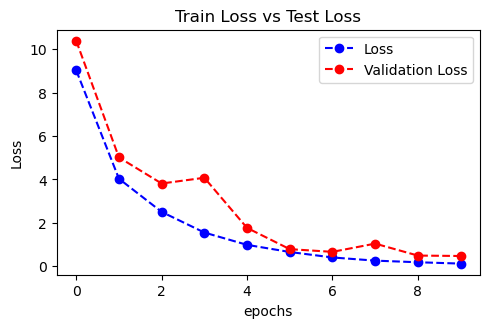

In [42]:
def plot_accuracy_loss(history):
    
#   plot accuracy
    plt.figure(figsize=(12, 7))
    plt.subplot(221)
    plt.plot(history.history["accuracy"], "bo--", label = "Accuracy")
    plt.plot(history.history["val_accuracy"], "ro--", label = "Validation Accuracy")
    plt.title("Train Accuracy vs Test Accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    plt.show()
    
#   plot loss function
    plt.figure(figsize=(12, 7))
    plt.subplot(221)
    plt.plot(history.history["loss"], "bo--", label = "Loss")
    plt.plot(history.history["val_loss"], "ro--", label = "Validation Loss")
    plt.title("Train Loss vs Test Loss")
    plt.ylabel("Loss")
    plt.xlabel("epochs")
    plt.legend()
    plt.show()
    
plot_accuracy_loss(history)

In [43]:
predictions = cnn_model.predict(x_test)
cnn_model.evaluate(x_test, y_test)
pred_labels = np.argmax(predictions, axis=1)

84/84 [==============================] - 5s 59ms/step - loss: 0.4761 - accuracy: 0.8844


In [44]:
print("Accuracy Score: \n ", accuracy_score(y_test, pred_labels))
print(" ")
print("classification_report: \n\n", classification_report(y_test, pred_labels))

Accuracy Score: 
  0.8843995510662177
 
classification_report: 

               precision    recall  f1-score   support

           0       0.90      0.94      0.92      1135
           1       0.95      0.79      0.86       841
           2       0.80      0.90      0.85       697

    accuracy                           0.88      2673
   macro avg       0.88      0.88      0.88      2673
weighted avg       0.89      0.88      0.88      2673



In [46]:
print(" ")
print("Confusion Matrix: \n\n", confusion_matrix(y_test, pred_labels))

 
Confusion Matrix: 

 [[1070   21   44]
 [  66  665  110]
 [  51   17  629]]
